# Analysis Steps

## 1. Exploratory Data Analysis (EDA)

## 2. LDA Projection

### 2.1. Compute Mu and Within-Class Scatter Matrix (SW)

SW = S0 + S1 + S2 + S3 + S4
S0-S4 = Σ(Xi - μi)(Xi - μi)^T

### 2.2. Compute Between-Class Scatter Matrix (SB)

m = 1/k * Σ(k) = 1/5 * Σ(μi)
SB = Σ(Ni (μi - m)(μi - m)^T)

### 2.3. Find LDA Projection Vector

S⁻¹W SB = V D V^T

## 3. Implement Naive Bayes

### 3.1. Get Simple Probabilities

### 3.2.

### 3.3.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Step 1 : Explore the data , EDA

In [2]:
# Specifying the path to your .npy file
train_file_path = 'fashion_train.npy'
test_file_path = 'fashion_test.npy'

# Load the data from the .npy file
train_data = np.load(train_file_path)
test_data = np.load(test_file_path)
print(train_data)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 3]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [3]:
#convert it to a dataframe
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
# print the first 5 items
print(train_df.head())

   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    0    0    0    0    0    3    0    0    0   41  ...   63   78   11    0   
1    0    0    0    0    0    0    0    0    0    0  ...   32    0    0    0   
2    0    0    0    0    0    1    1    0    0    0  ...  168  119    0    0   
3    0    0    0    0    0    0    0    0    0   98  ...   21    0    0    0   
4    0    0    0    0    0    0    0    2    0    0  ...   88  128   46    0   

   779  780  781  782  783  784  
0    2    0    0    0    0    0  
1    0    0    0    0    0    1  
2    0    0    0    0    0    0  
3    0    0    0    0    0    3  
4    0    0    0    0    0    4  

[5 rows x 785 columns]


### Plot their means

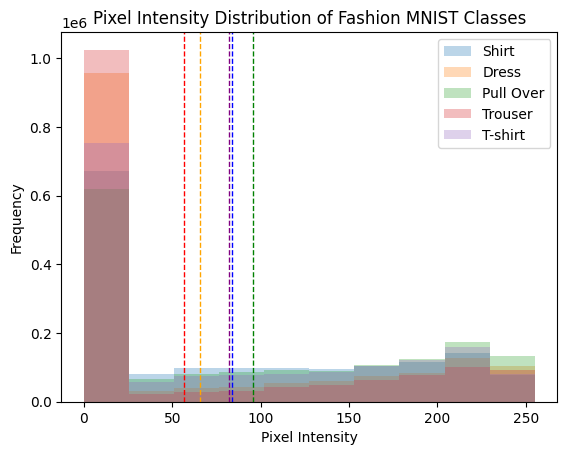

In [4]:
#get list of
t_shirt_list = []
trouser_list = []
pull_over_list = []
dress_list = []
shirt_list = []

#create subset of data with the different classes
for i in range(len(train_data)):
    if train_data[i][-1] == 0:
        t_shirt_list.append(train_data[i])
    elif train_data[i][-1] == 1:
        trouser_list.append(train_data[i])
    elif train_data[i][-1] == 2:
        pull_over_list.append(train_data[i])
    elif train_data[i][-1] == 3:
        dress_list.append(train_data[i])
    elif train_data[i][-1] == 4:
        shirt_list.append(train_data[i])

mu0_tshirts = np.mean(t_shirt_list)
mu1_trousers = np.mean(trouser_list)
mu2_pull_over = np.mean(pull_over_list)
mu3_dress = np.mean(dress_list)
mu4_shirt = np.mean(shirt_list)
concatenated_tshirt = np.concatenate(t_shirt_list)
concatenated_trouser = np.concatenate(trouser_list)
concatenated_pull_over = np.concatenate(pull_over_list)
concatenated_dress = np.concatenate(dress_list)
concatenated_shirt = np.concatenate(shirt_list)

#plot all the histograms on top of eachother
#plt.hist(concatenated_shirt)
#plt.hist(concatenated_dress)
#plt.hist(concatenated_pull_over)
#plt.hist(concatenated_trouser)
#plt.hist(concatenated_tshirt)
#add transparency
plt.hist(concatenated_shirt, alpha = 0.3)
plt.hist(concatenated_dress, alpha = 0.3)
plt.hist(concatenated_pull_over, alpha = 0.3)
plt.hist(concatenated_trouser, alpha = 0.3)
plt.hist(concatenated_tshirt, alpha = 0.3)
plt.legend(['Shirt', 'Dress', 'Pull Over', 'Trouser', 'T-shirt'])
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution of Fashion MNIST Classes')
#add mu lines
plt.axvline(mu0_tshirts, color='purple', linestyle='dashed', linewidth=1)
plt.axvline(mu1_trousers, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mu2_pull_over, color='green', linestyle='dashed', linewidth=1)
plt.axvline(mu3_dress, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mu4_shirt, color='blue', linestyle='dashed', linewidth=1)

## Step 2: LDA

## 2.1. Compute Mu and Within-Class Scatter Matrix (SW)

SW = S0 + S1 + S2 + S3 + S4
S0-S4 = Σ(Xi - μi)(Xi - μi)^T

In [5]:
# Get the data withouth the lables and only get the lables
x = train_data[:, :-1]
y = train_data[:, -1]

In [6]:
# Get the classes 

class_tshirt = train_data[train_data[:,-1]==0]
class_tshirt = class_tshirt[:,:-1]


class_trouser = train_data[train_data[:,-1]==1]
class_trouser = class_trouser[:,:-1]

class_pullover = train_data[train_data[:,-1]==2]
class_pullover = class_pullover[:,:-1]

class_dress = train_data[train_data[:,-1]==3]
class_dress = class_dress[:,:-1]


class_shirt = train_data[train_data[:,-1]==4]
class_shirt = class_shirt[:,:-1]

In [7]:
# Calculate the mean of each class
mean_tshirt = np.mean(class_tshirt,axis = 0)
mean_trouser = np.mean(class_trouser,axis = 0)
mean_pullover = np.mean(class_pullover,axis = 0)
mean_dress = np.mean(class_dress,axis = 0)
mean_shirt = np.mean(class_shirt,axis =0)


In [8]:
# Get the scatter matrix for each class (S_0, S_1, S_2, S_3, S_4)
scatter_tshirt = np.cov(class_tshirt.T)
scatter_trouser = np.cov(class_trouser.T)
scatter_pullover = np.cov(class_pullover.T)
scatter_dress = np.cov(class_dress.T)
scatter_shirt = np.cov(class_shirt.T)


In [9]:
# Calculating S_w -> scatter matrix
S_w = scatter_tshirt + scatter_trouser + scatter_pullover + scatter_dress + scatter_shirt


## 2.1 Get the betweeness scatter matrix Sb
m = 1/k * Σ(k) = 1/5 * Σ(μi)
SB = Σ(Ni (μi - m)(μi - m)^T)

In [10]:
# Get m (global mean)
m = 1/5*(mean_tshirt+mean_trouser+mean_pullover+mean_dress+mean_shirt)
print(f" This is m {m}")

 This is m [2.58163397e-03 8.81689118e-03 6.40425516e-02 1.77386313e-01
 3.68941746e-01 6.98729482e-01 1.43336557e+00 4.06888693e+00
 1.07999436e+01 2.77319248e+01 6.23577691e+01 7.96894379e+01
 8.01430878e+01 7.14300200e+01 6.84331625e+01 7.72228891e+01
 8.21231713e+01 7.29360385e+01 4.85968703e+01 1.79965899e+01
 6.15582265e+00 2.15656199e+00 8.82495587e-01 4.74015181e-01
 1.84437533e-01 7.79096991e-02 1.06900110e-02 2.97606919e-03
 5.64148659e-03 1.81667815e-02 1.25370942e-01 4.74341973e-01
 9.75567862e-01 3.50390610e+00 1.35876280e+01 3.35442852e+01
 6.02471719e+01 9.57131255e+01 1.37637977e+02 1.60808222e+02
 1.76134855e+02 1.71021429e+02 1.67745474e+02 1.75002934e+02
 1.70553550e+02 1.46140994e+02 1.23281175e+02 7.87504344e+01
 4.44948901e+01 2.08064587e+01 6.44475660e+00 1.79982964e+00
 6.46990296e-01 2.54145436e-01 6.65820549e-02 2.25595090e-02
 1.36772453e-02 5.04304599e-02 2.07934429e-01 7.43246077e-01
 3.26058337e+00 1.68992432e+01 4.34221358e+01 6.47060835e+01
 8.62982401e+

In [11]:
# betweeness_scatter
S_b= (
len(class_tshirt)*np.outer((mean_tshirt-m),(mean_tshirt-m).T) + 
len(class_trouser)*np.outer((mean_trouser-m),(mean_trouser-m).T)+
len(class_pullover)*np.outer((mean_pullover-m),(mean_pullover-m).T)+ 
len(class_dress)*np.outer((mean_dress-m),(mean_dress-m).T) + 
len(class_shirt)*np.outer((mean_shirt-m),(mean_shirt-m).T)
)

In [12]:
# find M, which is the discriminant matrix  M= S_w(inverse) * S_b
S_W_inv = np.linalg.inv(S_w)
discr_matrix = np.dot(S_W_inv , S_b)



In [13]:
# Get the eigen values and eigen vectors of the discriminant matrix  M
eigen_values, eigen_vectors = np.linalg.eig(discr_matrix)
eigen_vectors[0,]


array([ 0.51675665+0.j        , -0.43367762+0.j        ,
        0.45864885+0.j        , -0.32527175+0.j        ,
       -0.73870458+0.j        ,  0.29624178+0.j        ,
        0.31622715-0.00924813j,  0.31622715+0.00924813j,
       -0.23407389+0.j        ,  0.82266526+0.j        ,
       -0.21867495+0.j        , -0.63095557+0.j        ,
       -0.63095557-0.j        , -0.0591029 -0.46690203j,
       -0.0591029 +0.46690203j, -0.7550849 +0.j        ,
       -0.7550849 -0.j        , -0.07987935+0.59460275j,
       -0.07987935-0.59460275j, -0.17109309+0.32453855j,
       -0.17109309-0.32453855j, -0.27151236-0.35252438j,
       -0.27151236+0.35252438j,  0.20946428-0.0773118j ,
        0.20946428+0.0773118j , -0.44720298+0.10966972j,
       -0.44720298-0.10966972j,  0.11229905+0.j        ,
       -0.2080066 +0.j        ,  0.47705109+0.16985028j,
        0.47705109-0.16985028j, -0.87338563+0.j        ,
       -0.87338563-0.j        ,  0.89213475+0.j        ,
       -0.83711623+0.j        ,

In [20]:
import numpy as np

# Assuming you have already calculated eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(discr_matrix)

# Create pairs of eigenvalues and eigenvectors
eigen_pairs = [(eigen_values[i], eigen_vectors[:, i]) for i in range(len(eigen_values))]

# Sort the eigenvalue-eigenvector pairs based on eigenvalues
eigen_pairs.sort(key=lambda x: x[0], reverse=True)

# Extract the top 2 eigenvalues and corresponding eigenvectors
top_eigenvalues = [eigen_pairs[i][0] for i in range(2)]
top_eigenvectors = [eigen_pairs[i][1] for i in range(2)]

# Convert the lists to numpy arrays if needed
top_eigenvalues = np.array(top_eigenvalues)
top_eigenvectors = np.array(top_eigenvectors)

# Now top_eigenvalues and top_eigenvectors contain the top 2 eigenvalues and corresponding eigenvectors
print(top_eigenvectors.shape)

(2, 784)


In [45]:
# Transoforming the eigenvectoræs to real numbers
top_eigenvectors_real_nb = np.real(top_eigenvectors)
print(top_eigenvectors_real_nb.shape)
x1 =top_eigenvectors_real_nb[0]
x2 = top_eigenvectors_real_nb[1]
print(x1.shape)
print(x2.shape)

(2, 784)
(784,)
(784,)


In [41]:
# Add LDA from a library and compare the reuslts


In [25]:
# ADD pca and see which one does a better job maybe
print(class_tshirt.shape)

(2033, 784)


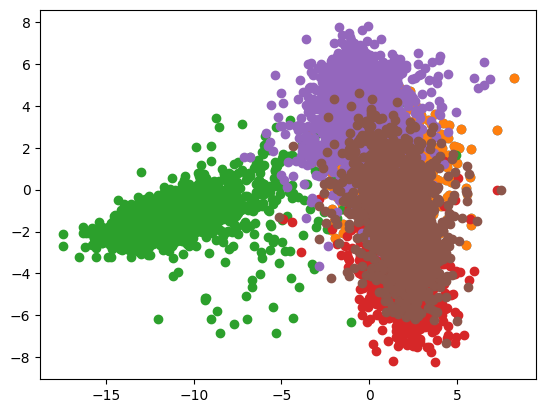

In [59]:
#Do scatter plot for each class to seee how LDA works

tshirt_proj_x1 = np.dot(class_tshirt,x1)
tshirt_proj_x2 = np.dot(class_tshirt,x2)

plt.scatter(tshirt_proj_x1,tshirt_proj_x2)

trouser_proj_x1 = np.dot(class_trouser,x1)
trouser_proj_x2 = np.dot(class_trouser,x2)


plt.scatter(tshirt_proj_x1,tshirt_proj_x2)
plt.scatter(trouser_proj_x1,trouser_proj_x2)

pullover_proj_x1 = np.dot(class_pullover,x1)
pullover_proj_x2 = np.dot(class_pullover,x2)

plt.scatter(pullover_proj_x1,pullover_proj_x2)

dress_proj_x1 = np.dot(class_dress,x1)
dress_proj_x2 = np.dot(class_dress,x2)

plt.scatter(dress_proj_x1,dress_proj_x2)

shirts_proj_x1 = np.dot(class_shirt,x1)
shirts_proj_x2 = np.dot(class_shirt,x2)

plt.scatter(shirts_proj_x1,shirts_proj_x2)

## Step 3: Implementing Naive Bayes

# 3.1 Getting the simple probabilities